<a href="https://colab.research.google.com/github/Ilmif/nlp-hotel-review/blob/main/NLP_sentimen_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Library yang dibutuhkan untuk analisis sentimen dan stowords yang sesuai untuk analisis review hotel

In [1]:
# Standard Library
import string
import re

# Third-party Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("stopwords")
id_stop = set(stopwords.words("indonesian"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 2. Import data set review hotel dan cek dataset

In [2]:
ds = pd.read_csv("https://raw.githubusercontent.com/rakkaalhazimi/Data-NLP-Bahasa-Indonesia/main/review_hotel.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14856 entries, 0 to 14855
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    14856 non-null  object
 1   review_text  14856 non-null  object
 2   category     14856 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 348.3+ KB


review id adalah primary key yaitu key yang khusus untuk menunjukkan id penulis, kemudian untuk review text adalah inputan dari user atau penulis mengenai hotel, kemudian kolom category ialah kolom target dari dataset yang mengkategorykan analisis sentimen.

In [3]:
ds.head(5)

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0


Dari sample data kategory 0 memberikan review yang buruk dari kata bocor, kotor, bau, tidak bersih, wifi tidak ada.
sedangkan category 1 memberikan kesan yang positif yaitu dari kata rapi, bersih, suasana tenang, dll

Kesimpulannya sentimen negatif biasa bersih kalimat (Bocor, Rusak, terdapat kata tidak, dll)
sedangkan sentimen yang positif ( kata berisi bersih, tenang, rapi, dll)


### 3. Explorasi dataset

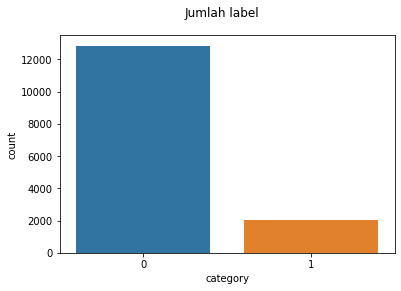

In [4]:
sns.countplot(data=ds, x="category")
plt.suptitle("Jumlah label")
plt.show()

In [5]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 4.4 MB/s 


data menunjukkan banyak review negatif

### 4. Praprocessing text


In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [7]:
punctuations = re.sub(r"[!<_>#:)\.]", "", string.punctuation)
def text_praprocessing(text):
    text = text.lower() ## membuat huruf menjadil huruf kecil semua
    table = text.maketrans("", "", string.punctuation)
    text = text.translate(table) ## menghilangkan tanda baca
    re.sub(r"[{}]+".format(punctuations), " ", text) ## menghilangkan simbol simbol
    stemmer.stem(text)
    return text

Proses stemming tidak dilakukan karena memberikan beban komputasi yang cukup berat dengan jumlah dataset yang mencapai 15000 baris

In [8]:
ds["afterpreprocess_review"] = ds["review_text"].map(text_praprocessing)
ds.head(5)

,review_id,review_text,category,afterpreprocess_review
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1,penginapannya rapi bersih suasana tenang pelay...
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0,wifi tidak sampai kamar tidak tersedia heater ...
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0,lantai kamar mandi kotor bau dan seperti sdh j...
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0,wc jorok kasur tidak dibersihkan handuk tidak ...
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0,bocor lagi


In [9]:
ds.sample(5)

,review_id,review_text,category,afterpreprocess_review
2331,b599ce7da8336dbc95ffe56fb5f69b7b,"hotel nyaman, bersih, dekat dengan mall. pelay...",1,hotel nyaman bersih dekat dengan mall pelayana...
7606,128eca668661d53d22cc1307275f3093,gak jd nginap disini krn nunggu hampir 2jam tp...,0,gak jd nginap disini krn nunggu hampir 2jam tp...
8089,f8955e010106cedf2d22abf20f4ce580,"handuk musti minta dulu, gak ada selimut, kama...",0,handuk musti minta dulu gak ada selimut kamar ...
2040,66510a573500dbe9785033e369239291,Kamarnya kurang bersih,0,kamarnya kurang bersih
8544,b2b8cd7fc4560f3708ac37478a9388b1,Versi dan nyaman dan pelayanannya baik,1,versi dan nyaman dan pelayanannya baik


Stemmer text


In [8]:
!pip install Sastrawi

### 5. Feature extracton

In [10]:
clean_review = ds["afterpreprocess_review"].values
label = ds["category"]

### 6. Vectorizing word dan model building

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer1 = CountVectorizer() #countvector
review_vect = vectorizer1.fit_transform(clean_review)
review_vect

vectorizer2 = TfidfVectorizer() #tf_idvectorizer
review_vect1 = vectorizer2.fit_transform(clean_review)
review_vect1

<14856x16898 sparse matrix of type '<class 'numpy.float64'>'
	with 214617 stored elements in Compressed Sparse Row format>

Tidak menghilangkan stopwords, karena akan menimbulkan bias untuk kata seperti tidak, bukan, dll yang cenderung memiliki sentimen negatif

In [12]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression()

In [13]:
from sklearn.naive_bayes import MultinomialNB
MultiNB = MultinomialNB()

### 7. split data

In [14]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(clean_review, label, test_size=0.2, random_state=89, stratify = label)

### 8. menggabungkan vectorizing dan modelling

In [15]:
from sklearn.pipeline import Pipeline


In [16]:
 modelling_pipe1 = Pipeline(
    [
     ("vectorizer", vectorizer1),
     ("classifier", logres)
    ]
)

In [17]:
  modelling_pipe2 = Pipeline(
    [
     ("vectorizer", vectorizer1),
     ("classifier", MultiNB)
    ]
)

In [18]:
   modelling_pipe3 = Pipeline(
    [
     ("vectorizer", vectorizer2),
     ("classifier", logres)
    ]
)

In [19]:
    modelling_pipe4 = Pipeline(
    [
     ("vectorizer", vectorizer2),
     ("classifier", MultiNB)
    ]
)

In [20]:
modelling_pipe1.fit(train_X, train_y)
modelling_pipe1.score(test_X, test_y)

0.9377523553162853

In [21]:
modelling_pipe2.fit(train_X, train_y)
modelling_pipe2.score(test_X, test_y)

0.9212651413189771

In [22]:
modelling_pipe3.fit(train_X, train_y)
modelling_pipe3.score(test_X, test_y)

0.9327052489905787

In [23]:
modelling_pipe4.fit(train_X, train_y)
modelling_pipe4.score(test_X, test_y)

0.8771870794078062

### 9. Evaluasi Model

In [24]:
from sklearn.metrics import classification_report
modelling_pipe1_report = classification_report(y_true=test_y, y_pred=modelling_pipe1.predict(test_X))
print(modelling_pipe1_report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2568
           1       0.70      0.76      0.73       404

    accuracy                           0.92      2972
   macro avg       0.83      0.85      0.84      2972
weighted avg       0.93      0.92      0.92      2972



In [25]:
modelling_pipe2_report = classification_report(y_true=test_y, y_pred=modelling_pipe2.predict(test_X))
print(modelling_pipe2_report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2568
           1       0.86      0.26      0.40       404

    accuracy                           0.89      2972
   macro avg       0.88      0.63      0.67      2972
weighted avg       0.89      0.89      0.87      2972



In [26]:
modelling_pipe3_report = classification_report(y_true=test_y, y_pred=modelling_pipe3.predict(test_X))
print(modelling_pipe3_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2568
           1       0.91      0.56      0.69       404

    accuracy                           0.93      2972
   macro avg       0.92      0.78      0.83      2972
weighted avg       0.93      0.93      0.93      2972



In [27]:
modelling_pipe4_report = classification_report(y_true=test_y, y_pred=modelling_pipe4.predict(test_X))
print(modelling_pipe4_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2568
           1       0.84      0.12      0.21       404

    accuracy                           0.88      2972
   macro avg       0.86      0.56      0.57      2972
weighted avg       0.87      0.88      0.83      2972



recal dan precisi masih tidak bagus untuk memprediksi kategory 1, menggunakan model log res dan countvectorizer sudah cukup bagus. perlu dicoba untuk menambah data mengenai review sentimen positif

In [28]:
contoh_review = ["hotel bersih, tempat tidur keras, rapi"]

modelling_pipe1.predict(contoh_review)

array([1])

In [32]:
modelling_pipe2.predict(contoh_review)

array([0])

In [29]:
modelling_pipe3.predict(contoh_review)

array([1])

Hyperparameter countvectorizer dan logistic regression

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
logres1 = LogisticRegression(solver = 'saga',random_state = 50, tol=1e-4, max_iter=200)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

In [68]:
train1_X, test1_X, train1_y, test1_y = train_test_split(clean_review, label, test_size=0.2, random_state=89, stratify = label)

In [70]:
rf_tuned = RandomizedSearchCV(logres1,  distributions, cv=6, random_state=42, scoring='recall')

In [73]:
  modelling_pipe5 = Pipeline(
    [
     ("vectorizer", vectorizer1),
     ("classifier", rf_tuned)
    ]
)

In [75]:
search = modelling_pipe5.fit(train1_X, train1_y)
rf_tuned.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

{'C': 2.832290311184182, 'penalty': 'l1'}

In [76]:
modellhyper_report = classification_report(y_true=test1_y, y_pred=search.predict(test1_X))
print(modellhyper_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2568
           1       0.84      0.68      0.75       404

    accuracy                           0.94      2972
   macro avg       0.89      0.83      0.86      2972
weighted avg       0.94      0.94      0.94      2972



In [77]:
search.predict(contoh_review)

array([1])

## Modellling using LSTM


In [35]:
!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 4.9 MB 5.2 MB/s 
     |████████████████████████████████| 462 kB 59.9 MB/s 


In [36]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import tensorflow_text as text
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

In [37]:
BATCH_SIZE = 32

In [38]:
# Ubah input menjadi objek tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y))

# Terapkan shuffle, batch dan prefetch pada dataset
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

melihat kembali dataset

In [39]:
for feat, tar in train_dataset.take(1):
    print(feat[:3])
    print(tar[:3])

tf.Tensor(
[b'bersih sebenernya kasurnya pun nyaman bgt tapi punten euy kamar mandinya ngegenang airnya'
 b'kl utk interior lokasi kenyamanan n keamanan ok \xf0\x9f\x91\x8d tp syg saat pertama mau chek in agak susah krn tanda airy rooms nya ngak ada \xf0\x9f\x98\x9f '
 b'proses check in lama  saya datang lapor check in 1400 tp bru bisa masuk kamar 1430'], shape=(3,), dtype=string)
tf.Tensor([0 1 0], shape=(3,), dtype=int64)


### Text Encoder


In [40]:
embedding_dim = 16   
encoder = keras.layers.TextVectorization()
encoder.adapt(train_dataset.map(lambda feat, tar: feat))

In [41]:
encoder(feat)[:3]

<tf.Tensor: shape=(3, 58), dtype=int64, numpy=
array([[  13, 1276,  289,  187,   24,  124,   26, 4504, 5257,    2,  126,
        9075,  118,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 837,  130, 1087,   79,  480,  230,  858,  148, 1546,   68, 1393,
          87,  155,   76,  468,   65,   48,  125,  154, 1163,   14,  312,
           8,  765,    5, 2488,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 503,   70,   65,   92,   12,  239, 1288,   70,   65, 1205,   68,
        1628,   27,   75,    2, 5762,    0,    0,    0,    0,    0,    0,
           

In [123]:
# Buat model sequential (berurutan)
modellstm = keras.Sequential()
modellstm.add(encoder)
modellstm.add(keras.layers.Embedding(
    input_dim=len(encoder.get_vocabulary()), 
    output_dim=embedding_dim, 
    mask_zero=True)
)
modellstm.add(keras.layers.LSTM(16, return_sequences=True))
modellstm.add(keras.layers.LSTM(16))
modellstm.add(keras.layers.Dropout(0.5))
modellstm.add(keras.layers.Dense(8))
modellstm.add(keras.layers.Dense(1, activation="sigmoid"))

# Tentukan loss, optimizer dan metrik yang akan digunakan
modellstm.compile(loss="binary_crossentropy", 
              optimizer="rmsprop",
              metrics=["acc"])

In [101]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=1e-2, patience=1, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_acc", factor=1e-1, patience=5, verbose=1, min_delta=1e-2)

In [115]:
! mkdir modellstm

In [116]:
checkpoint_path = "modellstm/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [99]:
import os

In [124]:
history = modellstm.fit(train_dataset,
                    epochs=15,
                    validation_data=test_dataset,
                    callbacks=[cp_callback])

Epoch 1/15
372/372 [==============================] - ETA: 0s - loss: 0.2957 - acc: 0.9079
Epoch 1: saving model to modellstm/cp.ckpt
372/372 [==============================] - 45s 83ms/step - loss: 0.2957 - acc: 0.9079 - val_loss: 0.2161 - val_acc: 0.9293
Epoch 2/15
372/372 [==============================] - ETA: 0s - loss: 0.1788 - acc: 0.9480
Epoch 2: saving model to modellstm/cp.ckpt
372/372 [==============================] - 27s 73ms/step - loss: 0.1788 - acc: 0.9480 - val_loss: 0.1902 - val_acc: 0.9371
Epoch 3/15
372/372 [==============================] - ETA: 0s - loss: 0.1531 - acc: 0.9546
Epoch 3: saving model to modellstm/cp.ckpt
372/372 [==============================] - 27s 72ms/step - loss: 0.1531 - acc: 0.9546 - val_loss: 0.1807 - val_acc: 0.9411
Epoch 4/15
372/372 [==============================] - ETA: 0s - loss: 0.1396 - acc: 0.9578
Epoch 4: saving model to modellstm/cp.ckpt
372/372 [==============================] - 27s 72ms/step - loss: 0.1396 - acc: 0.9578 - val_los

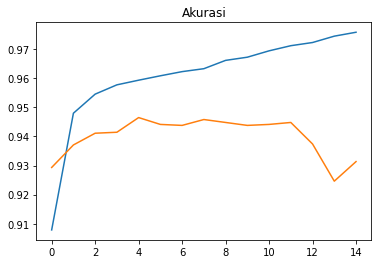

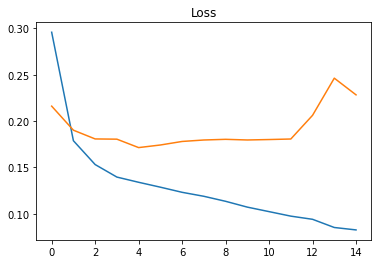

In [125]:
plt.figure()
plt.title("Akurasi")
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

plt.figure()
plt.title("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.show()

In [127]:
modellstm.predict(contoh_review)

array([[0.43312216]], dtype=float32)

menggunakan LSTM menghasilkan akurasi prediksi yang hanpir sama dengan 

### Saving model


In [46]:
pip install pyyaml h5py

In [47]:
!pip install joblib

In [48]:
import joblib

In [95]:
joblib_file = "modelling_sentimen_analisis1.pkl"
joblib.dump(modelling_pipe1, joblib_file)

['modelling_sentimen_analisis1.pkl']

In [96]:
joblib_file2 = "modelling_sentimen_analisis2.pkl"
joblib.dump(modelling_pipe3, joblib_file2)

['modelling_sentimen_analisis2.pkl']

In [97]:
joblib_file3 = "modelling_sentimen_analisis3.pkl"
joblib.dump(modelling_pipe5, joblib_file3)

['modelling_sentimen_analisis3.pkl']

In [111]:
modellstm.save("analisis_sentimenlstm",save_format='tf')

INFO:tensorflow:Assets written to: analisis_sentimenlstm/assets


INFO:tensorflow:Assets written to: analisis_sentimenlstm/assets


In [52]:
modellstm.save_weights("analisis_sentimenlstm_weights", save_format='tf')

In [130]:
modellstm.save_weights(checkpoint_path.format(epoch=10))

In [132]:
modellstm.load_weights(checkpoint_path)

In [134]:
loss, acc = modellstm.evaluate(test_X, test_y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

93/93 - 8s - loss: 0.2282 - acc: 0.9314 - 8s/epoch - 83ms/step
Restored model, accuracy: 93.14%


### fungsi untuk prediksi

Fungsi untuk data preprocessing

In [53]:
def text_praprocessing(text):
    text = text.lower() ## membuat huruf menjadil huruf kecil semua
    table = text.maketrans("", "", string.punctuation)
    text = text.translate(table) ## menghilangkan tanda baca
    re.sub(r"[{}]+".format(re.sub(r"[!<_>#:)\.]", "", string.punctuation)), " ", text) ## menghilangkan simbol simbol
    stemmer.stem(text)
    return text

fungsi untuk prediksi untuk modellingpipe 1

In [57]:
# Kita perlu memberikan keterangan pada label 0 dan 1
sentiment_map = {0: "Negatif", 1: "Positif"}

def predict_sentiment1(review):
    review_clean = text_praprocessing(review)

    prediction = int(modelling_pipe1.predict([review_clean]))
    sentiment1 =sentiment_map.get(prediction)
    return sentiment1

In [81]:
coba_review = ('tempat tidur empuk, kamar mandi bersih, ruangan harum')
predict_sentiment1(coba_review)

'Positif'

fungsi untuk prediksi untuk modellingpipe 3

In [59]:
def predict_sentiment2(review):
    review_clean = text_praprocessing(review)

    prediction = int(modelling_pipe3.predict([review_clean]))
    sentiment2 =sentiment_map.get(prediction)
    return sentiment2

fungsi untuk prediksi untuk modelling pipe 1 dengan hyper parameter tuning

In [79]:
def predict_sentiment3(review):
    review_clean = text_praprocessing(review)

    prediction = int(modelling_pipe5.predict([review_clean]))
    sentiment3 =sentiment_map.get(prediction)
    return sentiment3

In [82]:
predict_sentiment2(coba_review)

'Negatif'

In [84]:
predict_sentiment3(coba_review)

'Positif'

Fungsi untuk modell lstm

In [128]:
def predict_sentiment4(review):
    review_clean = text_praprocessing(review)
    prediction = modellstm.predict([review_clean])
    if prediction > 0.5 : print('positif')
    else : print('negatif')
    return prediction

In [129]:
predict_sentiment4(coba_review)

positif


array([[0.9728134]], dtype=float32)